# Estación Vallecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]

import warnings
warnings.filterwarnings('ignore')

In [2]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from itertools import product

In [3]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from tqdm import tqdm

In [4]:
df = pd.read_csv("../../data/df_40.csv", index_col=0)
df.index = pd.to_datetime(df.index)

In [5]:
df.head()

,NO2
month,
2013-01-01,47.838710
2013-02-01,35.612903
2013-03-01,27.903226
2013-04-01,26.516129
2013-05-01,26.870968


### Estacionalidad

In [6]:
df2 = df.copy()

In [7]:
df2["año"] = df.index.year
df2["mes"] = df.index.month

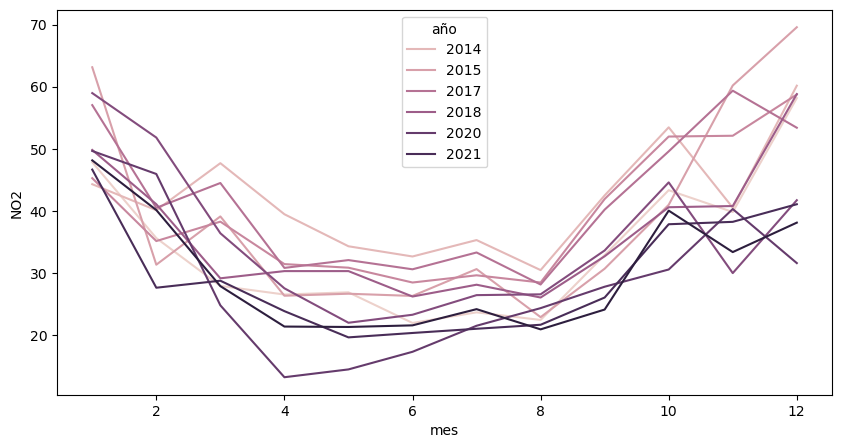

In [8]:
sns.lineplot(x = "mes", y = "NO2", hue = "año", data = df2);

### Estacionaridad

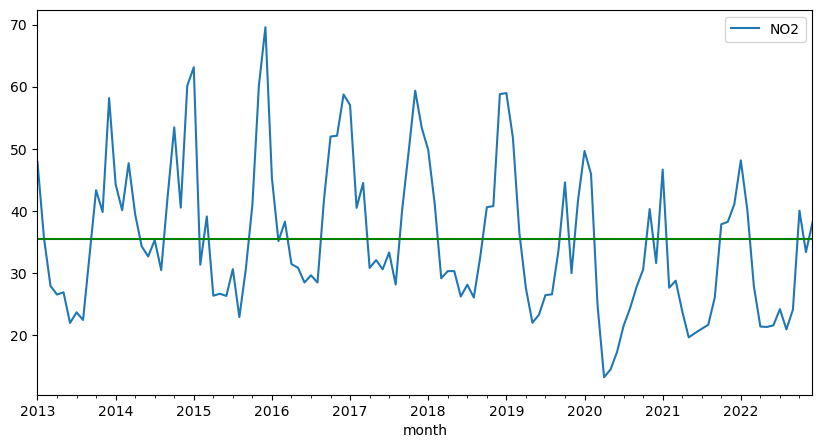

In [9]:
df.plot()
plt.axhline(df.NO2.mean(), c = "g");

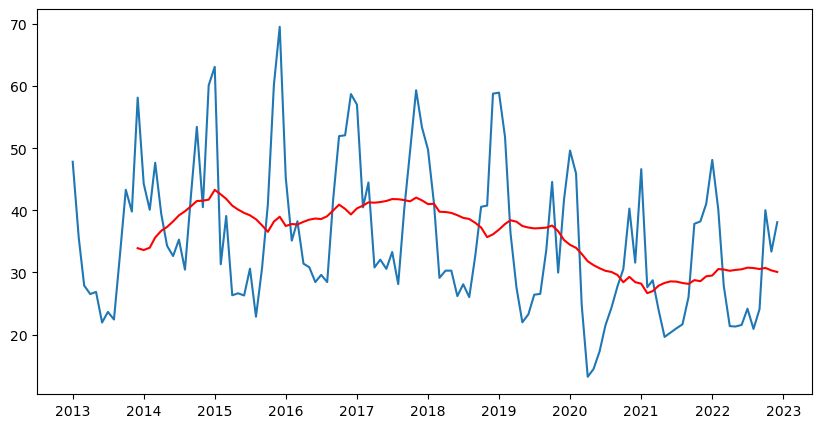

In [10]:
plt.plot(df["NO2"])
plt.plot(df.rolling(window= 12).mean(), c = "r");

In [11]:
df.head()

,NO2
month,
2013-01-01,47.838710
2013-02-01,35.612903
2013-03-01,27.903226
2013-04-01,26.516129
2013-05-01,26.870968


In [12]:
df2.head()

,NO2,año,mes
month,,,
2013-01-01,47.838710,2013,1
2013-02-01,35.612903,2013,2
2013-03-01,27.903226,2013,3
2013-04-01,26.516129,2013,4
2013-05-01,26.870968,2013,5


In [13]:
df3 = df.copy()

In [14]:
df3["year"] = df3.index.year
df3["month"] = df2.index.month
df3.head()

,NO2,year,month
month,,,
2013-01-01,47.838710,2013,1
2013-02-01,35.612903,2013,2
2013-03-01,27.903226,2013,3
2013-04-01,26.516129,2013,4
2013-05-01,26.870968,2013,5


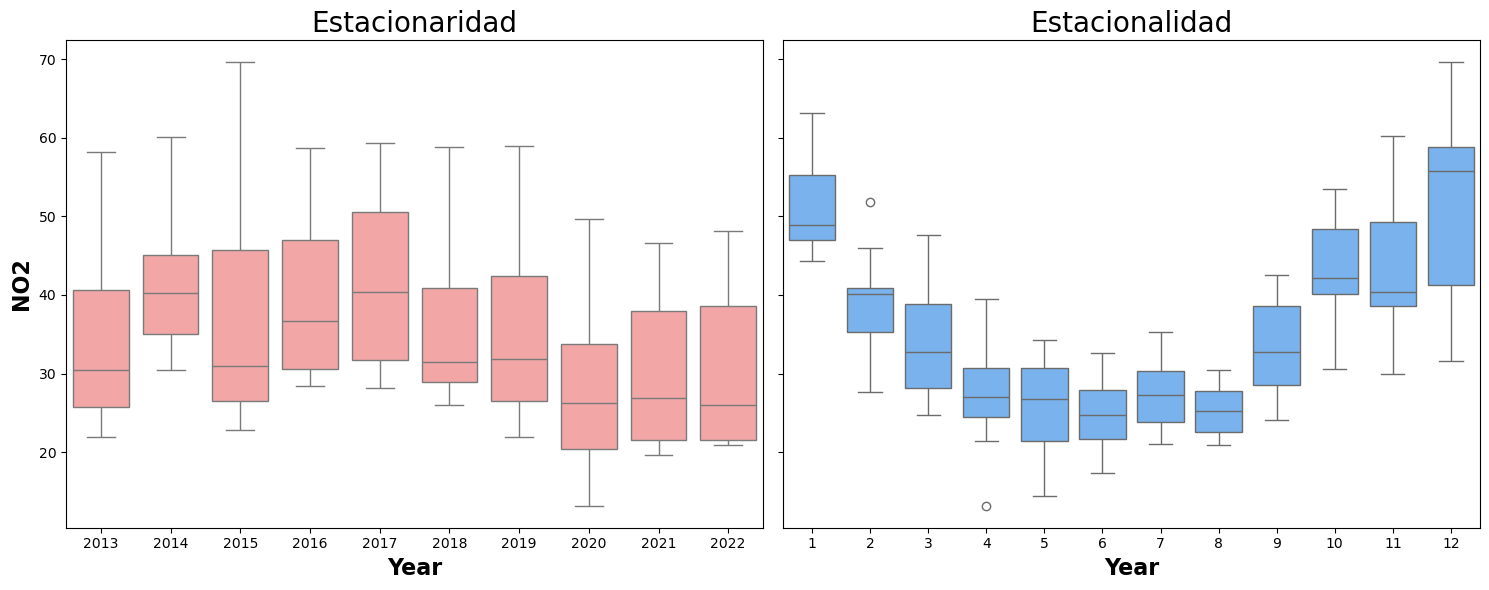

In [15]:
# Nos creamos una lista con las columnas de tiempo
tiempo = df3.columns.drop("NO2")

# Iniciamos los subplots
fig, ax = plt.subplots(nrows=1, ncols=len(tiempo), figsize=(15, 6), sharey=True)

# Nombres personalizados para los títulos
nombres = ["Estacionaridad", "Estacionalidad"]

# Colores bonitos para los boxplots
colores = ["#FF9999", "#66B2FF"]  # Puedes modificar estos códigos de colores

# Hacemos un loop para crear los boxplots para cada año
for i, col in enumerate(tiempo):
    sns.boxplot(data=df3, x=col, y="NO2", ax=ax[i], palette=[colores[i]])
    ax[i].set_title(nombres[i], fontsize=20, loc='center')
    ax[i].set_xlabel('Year', fontsize=16, fontdict=dict(weight='bold'))
    ax[i].set_ylabel('NO2', fontsize=16, fontdict=dict(weight='bold'))

plt.tight_layout()
plt.show()

No hay estacionaridad.

El de estacionalidad estudia todos los eneros, febreros,... de mis años muestra.

La aplicación de la estacionalidad (por ejemplo, a través de un modelo SARIMA con un parámetro estacional) sigue siendo relevante para comprender los patrones recurrentes en tus datos a lo largo del tiempo. Sin embargo, los desplazamientos o irregularidades en la mediana podrían indicar:

Cambios en los patrones estacionales: Las variaciones en la mediana podrían señalar cambios en los patrones estacionales a lo largo del tiempo. Esto puede requerir una exploración adicional para comprender si estas variaciones son anómalas o representan cambios genuinos en la estacionalidad.

Anomalías o eventos atípicos: La presencia de valores atípicos o eventos inusuales en los datos estacionales puede afectar la representación visual de la estacionalidad. Estos eventos pueden causar que la mediana no esté centrada en el boxplot.

En resumen, aunque la mediana desplazada en un boxplot puede indicar cierta variabilidad o cambios en los patrones estacionales, aún puedes aplicar el análisis estacional para comprender los ciclos recurrentes en tus datos. Sin embargo, es importante considerar las posibles anomalías o cambios en los datos que podrían estar afectando la representación visual de la estacionalidad.

### Test de Fuller

In [16]:
res = adfuller(df["NO2"])
res

(-0.5922661191342229,
 0.8727200083439914,
 11,
 108,
 {'1%': -3.4924012594942333,
  '5%': -2.8886968193364835,
  '10%': -2.5812552709190673},
 723.5058017900944)

In [17]:
print("AD Fuller Stats", res[0])
print("p-value", res[1])
print("Critical values")

for k, v in res[4].items():
    print(k, round(v, 2))

AD Fuller Stats -0.5922661191342229
p-value 0.8727200083439914
Critical values
1% -3.49
5% -2.89
10% -2.58


*Datos no estacionarios. Su media y su varianza están en función del tiempo 🍋*

### Autocorrelación

In [18]:
for i in range(49):
    print(f"{i} mes Lag, {df['NO2'].autocorr(lag= i)}")

0 mes Lag, 1.0
1 mes Lag, 0.6999899842434961
2 mes Lag, 0.41931124704214534
3 mes Lag, 0.13561258413135674
4 mes Lag, -0.16668067801177372
5 mes Lag, -0.3440111076348438
6 mes Lag, -0.4019098223963907
7 mes Lag, -0.3850875059864408
8 mes Lag, -0.21603592307509664
9 mes Lag, 0.08773412907190828
10 mes Lag, 0.37771513156378583
11 mes Lag, 0.6138916251016153
12 mes Lag, 0.7538011101509021
13 mes Lag, 0.626243137975062
14 mes Lag, 0.37271490116372114
15 mes Lag, 0.08553924904392918
16 mes Lag, -0.25380481478319095
17 mes Lag, -0.43839685794884103
18 mes Lag, -0.4845668950877894
19 mes Lag, -0.4268464738731326
20 mes Lag, -0.22737446739551076
21 mes Lag, 0.06709659432878068
22 mes Lag, 0.3061402969722113
23 mes Lag, 0.6060682354158804
24 mes Lag, 0.7569393134198804
25 mes Lag, 0.6130321176887209
26 mes Lag, 0.37059356527715187
27 mes Lag, 0.06602106504045024
28 mes Lag, -0.26682694510778515
29 mes Lag, -0.47533283236673673
30 mes Lag, -0.5430592212210422
31 mes Lag, -0.4985613097289071
32 m

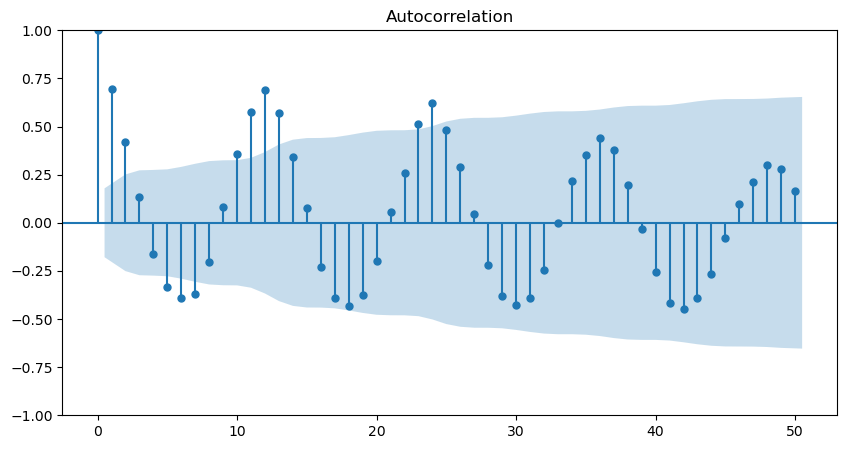

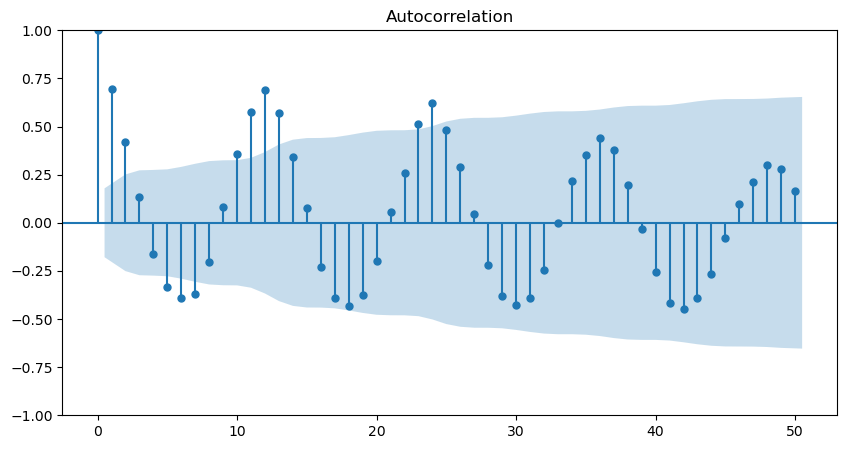

In [19]:
plot_acf(df, lags = 50)

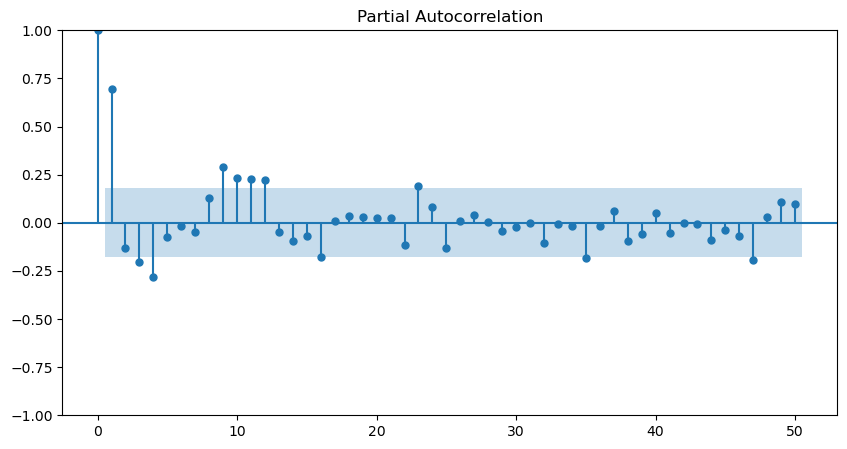

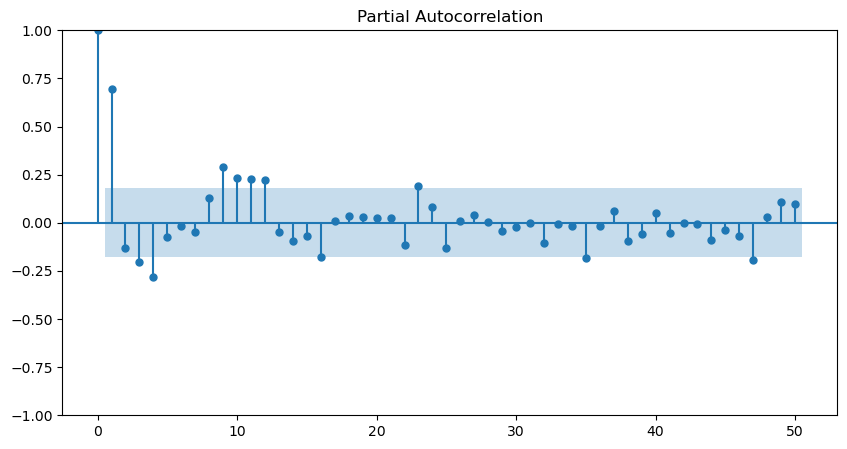

In [20]:
plot_pacf(df, lags = 50)

In [21]:
df.head()

,NO2
month,
2013-01-01,47.838710
2013-02-01,35.612903
2013-03-01,27.903226
2013-04-01,26.516129
2013-05-01,26.870968


In [22]:
df.shape

(120, 1)

In [23]:
df.isnull().sum()

NO2    0
dtype: int64

### SARIMA

In [24]:
y_test = df["NO2"][-30:]
y_train = df["NO2"][:-30]

In [25]:
ps = range(4)
ds = range(1,3)
qs = range(3)

parameters = list(product(ps,ds, qs))
print(parameters)

[(0, 1, 0), (0, 1, 1), (0, 1, 2), (0, 2, 0), (0, 2, 1), (0, 2, 2), (1, 1, 0), (1, 1, 1), (1, 1, 2), (1, 2, 0), (1, 2, 1), (1, 2, 2), (2, 1, 0), (2, 1, 1), (2, 1, 2), (2, 2, 0), (2, 2, 1), (2, 2, 2), (3, 1, 0), (3, 1, 1), (3, 1, 2), (3, 2, 0), (3, 2, 1), (3, 2, 2)]


In [26]:
%%time
rmse = []
order = []
for p, d, q in tqdm(parameters):
    try:
        modelo=ARIMA(y_train, order=(p, d, q)).fit()
        pred = modelo.predict(start=len(y_train), end=len(df) -1)
        error = np.sqrt(np.mean(mean_squared_error(y_test, pred)))
        rmse.append(error)
        order.append((p,d, q))
    except: 
        continue

  0%|          | 0/24 [00:00<?, ?it/s]C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_

C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 62%|██████▎   | 15/24 [00:00<00:00, 18.19it/s]C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\

CPU times: total: 234 ms
Wall time: 1.39 s


In [27]:
# veamos los resultados de todos los modelos
results = pd.DataFrame({"RMSE": rmse, "order": order})
results.sort_values(by="RMSE", inplace=True)
results.head()

,RMSE,order
14,7.801040,"(2, 1, 2)"
8,10.675812,"(1, 1, 2)"
20,13.848749,"(3, 1, 2)"
7,14.842544,"(1, 1, 1)"
1,14.941203,"(0, 1, 1)"


In [28]:
%%time

modelo=SARIMAX(endog=y_train, 
               exog=None,
               #order=(2, 1, 2),  # modelo arima
               seasonal_order=(2, 1, 2, 12) # modelo sarima, estacionalidad es el último valor
              ).fit(disp=False)
                     
pred=modelo.predict(len(y_train), len(df)-1)  

error=(pred-y_test).abs().sum()/len(pred) 
print ('Error mae: ', error)


res=pd.DataFrame({'real':y_test, 'pred':pred, 'error':pred-y_test})
res

C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Error mae:  5.123302786868485
CPU times: total: 188 ms
Wall time: 547 ms


,real,pred,error
2020-07-01,21.483871,21.733424,0.249554
2020-08-01,24.322581,21.327688,-2.994893
2020-09-01,27.774194,25.248075,-2.526119
2020-10-01,30.548387,34.933995,4.385608
2020-11-01,40.290323,35.164449,-5.125874
2020-12-01,31.580645,51.446905,19.866260
2021-01-01,46.645161,44.615938,-2.029223
2021-02-01,27.612903,51.373580,23.760677
2021-03-01,28.741935,30.494079,1.752144
2021-04-01,23.838710,20.729203,-3.109507


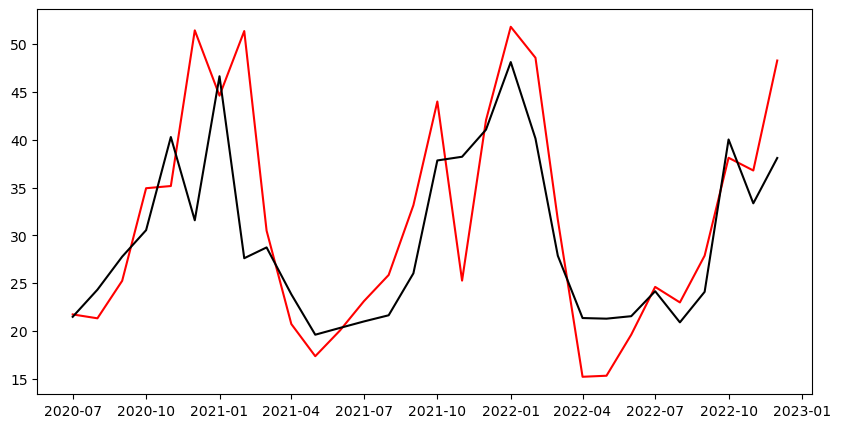

In [29]:
plt.plot(res["pred"], c = "r")
plt.plot(res["real"], c = "black");

In [30]:
pred["real_test"] = y_test

In [31]:
pred_año = pd.DataFrame(modelo.predict(start = len(df), end = len(df) + 9))
pred_año

,predicted_mean
2023-01-01,44.617859
2023-02-01,47.941899
2023-03-01,24.094887
2023-04-01,17.103225
2023-05-01,15.901181
2023-06-01,17.641712
2023-07-01,20.738301
2023-08-01,23.374320
2023-09-01,29.000350
2023-10-01,39.123696


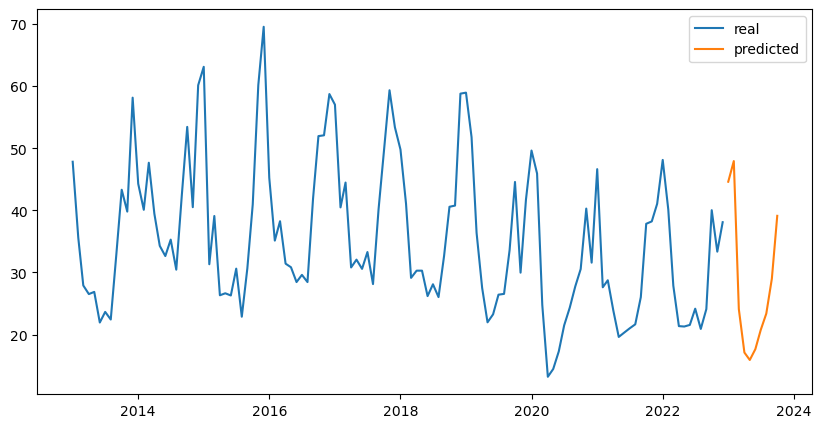

In [32]:
plt.plot(df)
plt.plot(pred_año)
plt.legend(["real", "predicted"]);

In [33]:
pred_año

,predicted_mean
2023-01-01,44.617859
2023-02-01,47.941899
2023-03-01,24.094887
2023-04-01,17.103225
2023-05-01,15.901181
2023-06-01,17.641712
2023-07-01,20.738301
2023-08-01,23.374320
2023-09-01,29.000350
2023-10-01,39.123696


## Datos reales 2023

In [34]:
df23 = pd.read_csv("../../data/emisiones23.csv")

In [35]:
df23.head()

,Unnamed: 0,ESTACION,ANO,MES,NO2
0,0,4,2023,1,32.516129
1,1,4,2023,2,36.741935
2,2,4,2023,3,27.806452
3,3,4,2023,4,22.838710
4,4,4,2023,5,16.612903


### Elijo la estación correspondiente

In [36]:
real = df23[df23["ESTACION"] == 40]
real

,Unnamed: 0,ESTACION,ANO,MES,NO2
118,118,40,2023,1,35.096774
119,119,40,2023,2,33.258065
120,120,40,2023,3,29.580645
121,121,40,2023,4,22.838710
122,122,40,2023,5,17.903226
123,123,40,2023,6,23.000000
124,124,40,2023,7,22.612903
125,125,40,2023,8,20.193548
126,126,40,2023,9,33.096774
127,127,40,2023,10,35.225806


In [37]:
import sys
sys.path.append('../../src')

from clean_support import NO2_clean, estacion_timeseries

In [38]:
estacion_timeseries(real)

,Unnamed: 0,NO2
month,,
2023-01-01,118,35.096774
2023-02-01,119,33.258065
2023-03-01,120,29.580645
2023-04-01,121,22.838710
2023-05-01,122,17.903226
2023-06-01,123,23.000000
2023-07-01,124,22.612903
2023-08-01,125,20.193548
2023-09-01,126,33.096774


In [39]:
real.drop("Unnamed: 0", axis=1, inplace=True)

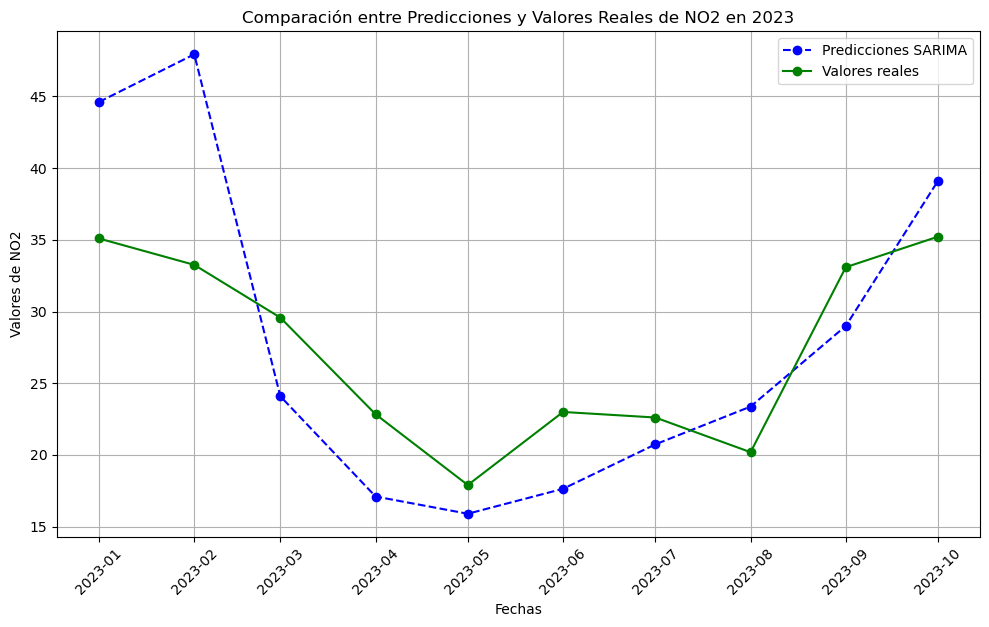

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Suponiendo que pred_año y df_08_23 son tus DataFrames con las predicciones y los valores reales respectivamente
# Asegúrate de tener las fechas como índices y las columnas 'predicted_mean' y 'NO2' disponibles

# Convertir las columnas de fechas a objetos datetime si es necesario
pred_año.index = pd.to_datetime(pred_año.index)
real.index = pd.to_datetime(real.index)

# Filtrar los datos de 2023 para enero a octubre
predicciones_2023 = pred_año['predicted_mean']['2023-01':'2023-10']
valores_reales_2023 = real['NO2']['2023-01':'2023-10']

# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.plot(predicciones_2023.index, predicciones_2023, color='blue', label='Predicciones SARIMA', linestyle='--', marker='o')
plt.plot(valores_reales_2023.index, valores_reales_2023, color='green', label='Valores reales', linestyle='-', marker='o')

# Añadir etiquetas, título y leyenda
plt.xlabel('Fechas')
plt.ylabel('Valores de NO2')
plt.title('Comparación entre Predicciones y Valores Reales de NO2 en 2023')
plt.legend()

# Mejorar el diseño
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)  # Rotar las fechas para mayor legibilidad

# Mostrar la gráfica
plt.show()

In [41]:
pred_año["predicted_mean"]
real["NO2"]

month
2023-01-01    35.096774
2023-02-01    33.258065
2023-03-01    29.580645
2023-04-01    22.838710
2023-05-01    17.903226
2023-06-01    23.000000
2023-07-01    22.612903
2023-08-01    20.193548
2023-09-01    33.096774
2023-10-01    35.225806
Freq: MS, Name: NO2, dtype: float64

### Estimación cierre 2023

In [42]:
pred_año_total = pd.DataFrame(modelo.predict(start = len(df), end = len(df) + 11))
pred_año_total

,predicted_mean
2023-01-01,44.617859
2023-02-01,47.941899
2023-03-01,24.094887
2023-04-01,17.103225
2023-05-01,15.901181
2023-06-01,17.641712
2023-07-01,20.738301
2023-08-01,23.374320
2023-09-01,29.000350
2023-10-01,39.123696


In [43]:
# Obtener las dos últimas filas de pred_año_total
ultimas_filas_pred_año = pred_año_total.tail(2)

# Renombrar la columna 'predicted_mean' como 'NO2' en las dos últimas filas
ultimas_filas_pred_año = ultimas_filas_pred_año.rename(columns={'predicted_mean': 'NO2'})

# Añadir las dos últimas filas al final de los datos reales
frames = [real, ultimas_filas_pred_año]
df_extendido = pd.concat(frames)

# Verificar el DataFrame extendido
df_extendido

,NO2
2023-01-01,35.096774
2023-02-01,33.258065
2023-03-01,29.580645
2023-04-01,22.838710
2023-05-01,17.903226
2023-06-01,23.000000
2023-07-01,22.612903
2023-08-01,20.193548
2023-09-01,33.096774
2023-10-01,35.225806


In [44]:
df_predict23 = df_extendido.mean()
df_predict23

NO2    28.910557
dtype: float64